# Применение K Means для квантования цветов

### Библиотеки


In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [56]:
import warnings
warnings.filterwarnings('ignore')

### Изображение

In [2]:
image_as_array = mpimg.imread('cat.jpg')

In [57]:
image_as_array.shape # H, W, C

(396, 391, 3)

In [58]:
image_as_array[0] # RGB-коды пикселей

array([[41, 35, 39],
       [42, 36, 40],
       [39, 33, 37],
       ...,
       [45, 31, 30],
       [46, 32, 31],
       [48, 34, 33]], dtype=uint8)

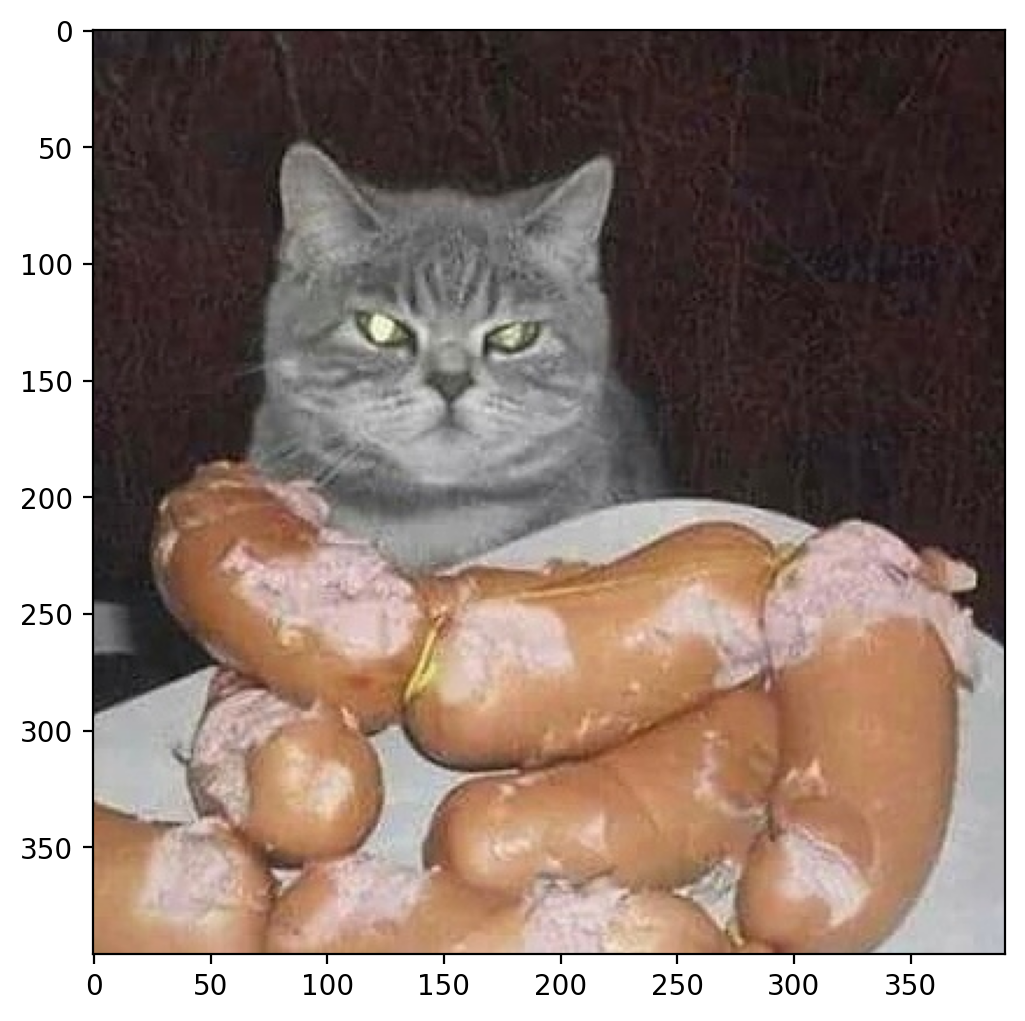

In [59]:
plt.figure(figsize=(6,6), dpi=200)
plt.imshow (image_as_array);

### Квантование цветов с помощью Kmeans

Мы уменьшим количество различных цветов до K штук. Оставим для начала 6.

* Сейчас у нас трехмерный массив - Высота, Ширина, Цвета.
* Kmeans работает с двумерными данными (строки с данными и колонки с признаками), поэтому:
* Преобразуем массив в двумерный - Высота*Ширина, Цвета.

In [7]:
image_as_array.shape
# h, w, c
# высота, ширина, цвета

(396, 391, 3)

In [8]:
(h,w,c) = image_as_array.shape

In [9]:
image_as_array2d = image_as_array.reshape(h*w,c)

#### Модель

In [10]:
from sklearn.cluster import KMeans

In [60]:
model = KMeans(n_clusters=6)

In [61]:
labels = model.fit_predict(image_as_array2d)

In [62]:
labels

array([0, 0, 0, ..., 3, 3, 3])

#### Посмотрим на центры кластеров
* Это будут 6 цветовых RGB-кодов.

In [63]:
model.cluster_centers_

array([[ 47.68580312,  34.97143956,  34.92351829],
       [195.4216829 , 147.09021236, 114.05758689],
       [168.24772703, 117.26040218,  84.74360894],
       [203.02075302, 185.72545487, 178.98681319],
       [108.65641546,  96.22107783,  89.0955973 ],
       [142.34533661, 139.01356893, 136.81674495]])

In [64]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [65]:
rgb_codes

array([[ 48,  35,  35],
       [195, 147, 114],
       [168, 117,  85],
       [203, 186, 179],
       [109,  96,  89],
       [142, 139, 137]])

#### Подставим вместо значений labels кластеров значения rgb_codes

In [66]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [67]:
quantized_image[0]

array([[48, 35, 35],
       [48, 35, 35],
       [48, 35, 35],
       ...,
       [48, 35, 35],
       [48, 35, 35],
       [48, 35, 35]])

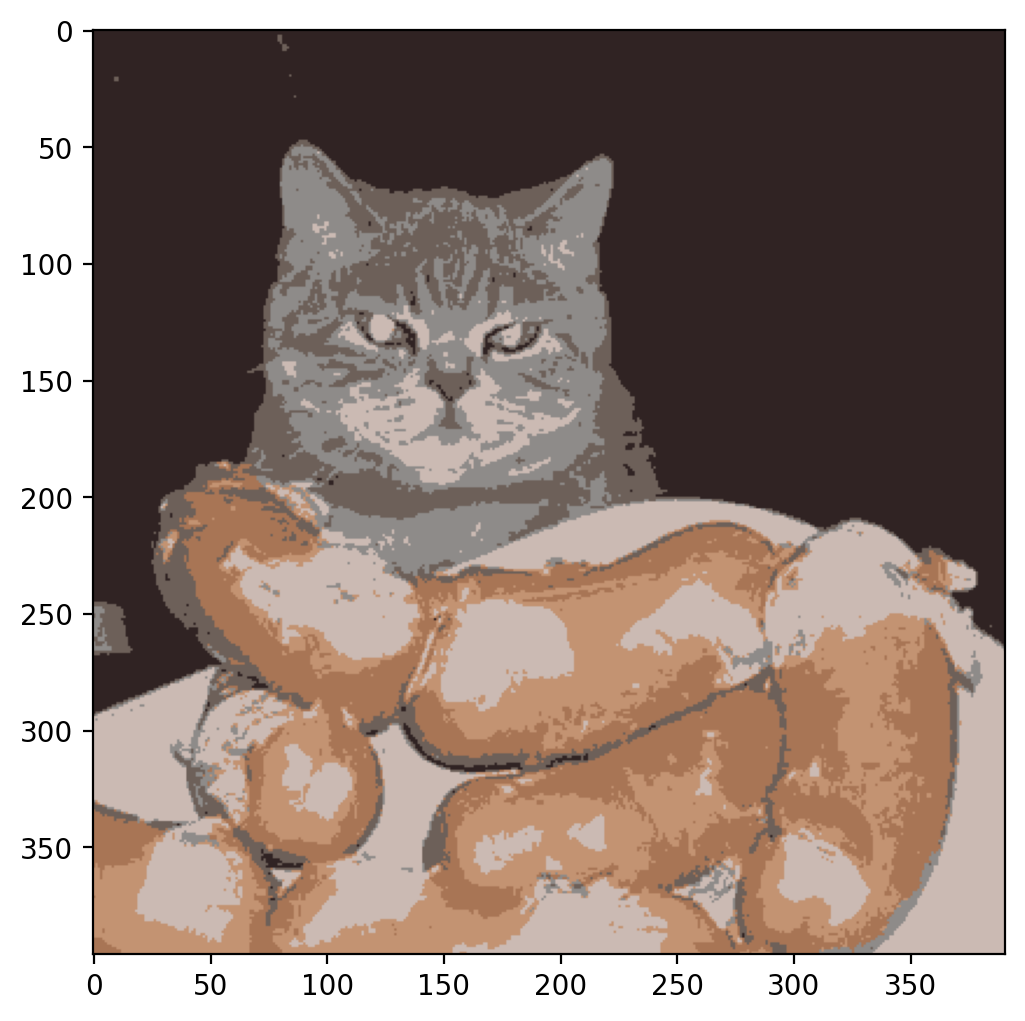

In [68]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image);

### Посмотрим, как меняется изображение с увеличением количества цветов

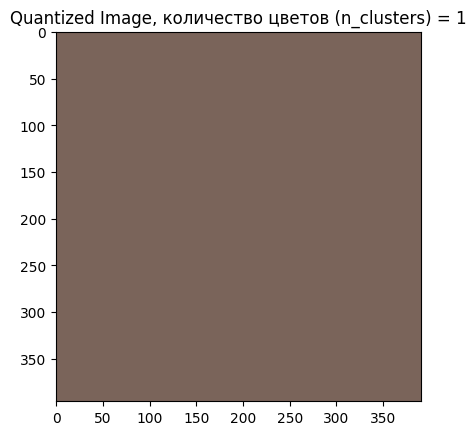

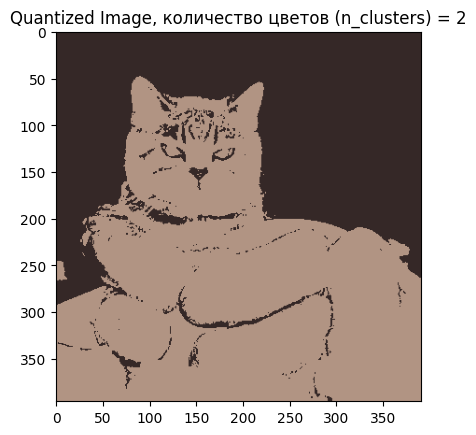

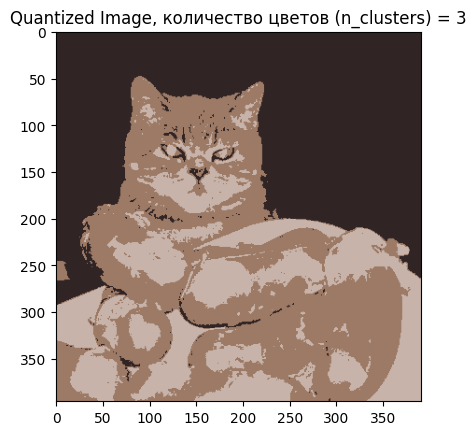

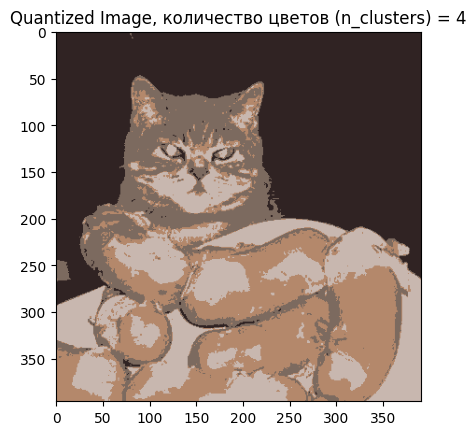

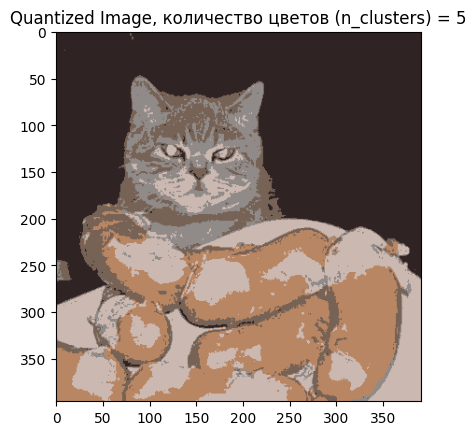

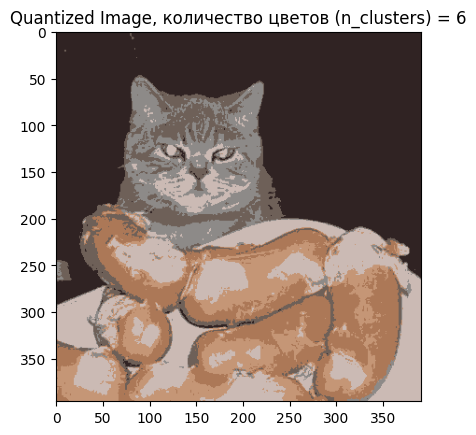

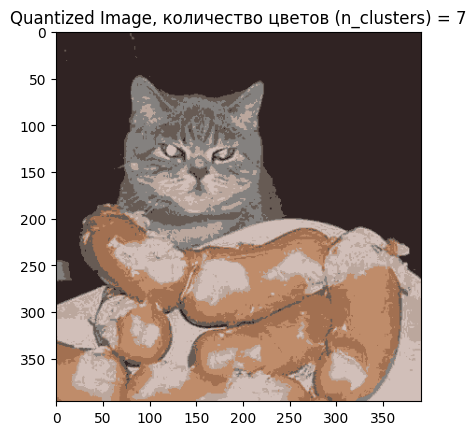

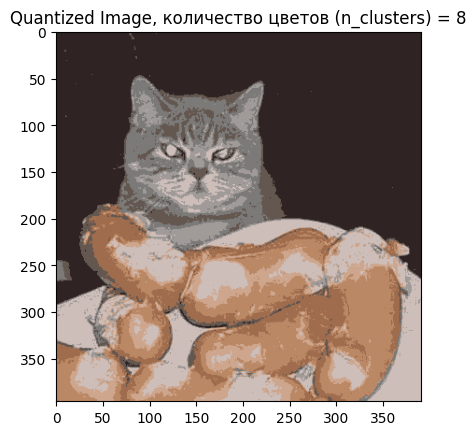

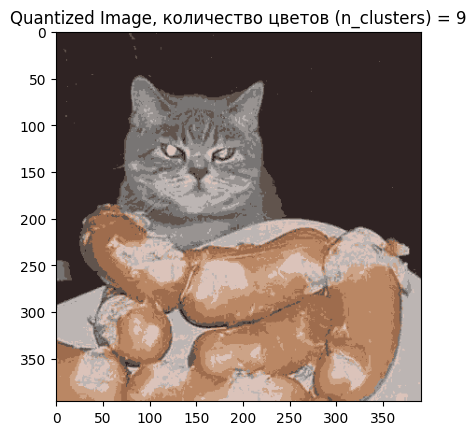

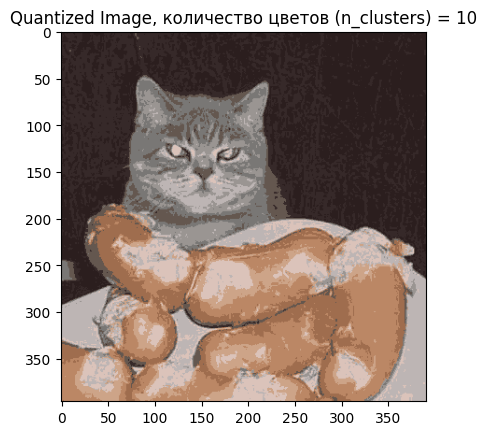

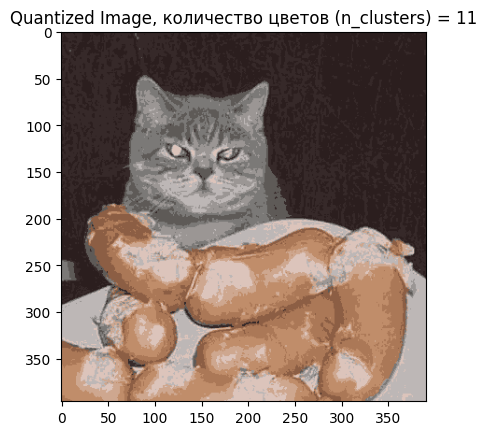

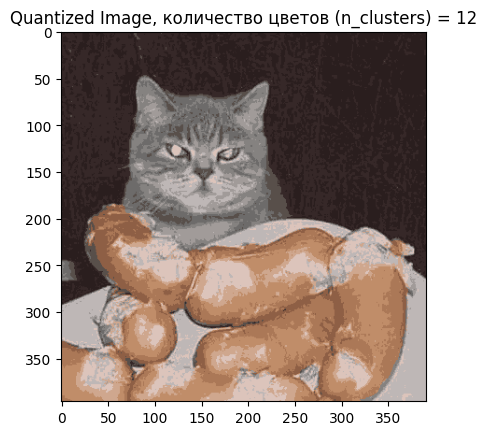

In [69]:
for n in range (1,13):
    model = KMeans(n_clusters = n)
    labels = model.fit_predict(image_as_array2d)
    rgb_codes = model.cluster_centers_.round(0).astype(int)
    quantized_image = np.reshape(rgb_codes[labels], (h, w, c))
    plt.imshow(quantized_image)
    plt.title("Quantized Image, количество цветов (n_clusters) = {}".format(n))
    plt.show()
    